**Question 1:** On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe.
We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

**i). Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
shopify_df = pd.read_csv('Shopify-Sheet1.csv')

In [30]:
shopify_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


I believe that the AOV $3145.13 is coming from the mean of the order_amount. To get more clarification, I would like to see the descriptive statistics of the order_amount, which will help us to summarize the central tendency, dispersion and shape of a dataset’s distribution.

In [52]:
# looking at the distribution of the Dataset in terms of order value
shopify_df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

We have total 5000 orders made over 30 days window. In above output its clear that the AOV 3,145.13 is derived from the mean of the orders. But, there is an incredibly large standard deviation of 41282.54. This means that on average, the values vary 41,282.54 from the mean, making the mean not a very useful representation of the AOV.

Above output also shows the minimum order value is 90 and max order value is 704,000. Other statistics includes first quartile (Q1) is 163, median is 284 and third quartile (Q3) is 390. Comparing these numbers, we can see that the maximum value (704000) is much higher than the other values. Considering our dataset has 5000 records, there are probably a few outlier values that are incredibly high and dragging up the mean. 

Lets inspect it further.

**Lets also look at the boxplot to understand the distribution in detail.**

{'whiskers': [<matplotlib.lines.Line2D at 0x117a007c0>,
 'caps': [<matplotlib.lines.Line2D at 0x117a00e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x117a00460>],
 'medians': [<matplotlib.lines.Line2D at 0x117a0b580>],
 'fliers': [<matplotlib.lines.Line2D at 0x117a0b880>],
 'means': []}

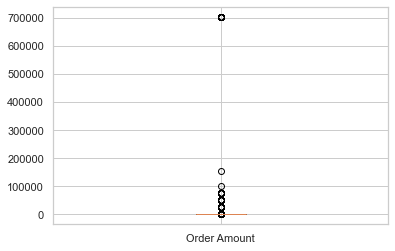

In [36]:
order_amount = shopify_df['order_amount'].values
plt.boxplot(order_amount, labels = ['Order Amount'])

Notice that most of the transactions are in range of few hundred or a few thousand dollars but some are quite huge ranging in order of hundereds of thousands. These can be further investegated to check for data issues or anomalies.

**Looking at the scatterplot to understand the order amount for each of our 5000 transactions in detail**

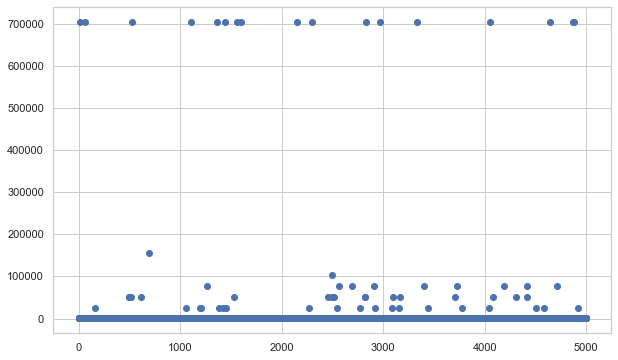

In [59]:
plt.figure(figsize=(10,6))
plt.scatter(x = shopify_df['order_id'], y = shopify_df['order_amount'], marker='o');

In the scatterplot, each point is denoting a particular order. Most of the transactions are along the blue line and, 17 orders are in the higher range (around 700,000). Lets count the number of transactions made with each order amount.

In [108]:
items_counts = shopify_df.groupby(['order_amount']).size().reset_index(name='count').sort_values(by='order_amount', ascending=False)
items_counts.head(10)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


We calculated the number of transactions made with each order amount and sorted them in descending order by order_amount. As we see the higher order values particularily 704000, 51450 and 25725 are repeated 17, 16 and 19 times. It's likely that these excessively large transactions are driving up the AOV.

Now, we can check the information related to these order amounts to understand the behaviour in detail. So, lets filter the orders by these values and check if these are some suspecious activities are involved.

In [113]:
shopify_df.loc[shopify_df['order_amount'].isin([704000, 51450, 25725])].sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00


We see that order amounts of 704000 to buy 2000 items were occured at the same time (4 AM) from the same user_id (607), same shop_id (42) and same transaction method (cerdit_card). There could be possiblity of some supplier purchasing 2000 shoes 17 times or there could be some data duplication issue.

And, the order amounts of 51450 and 25725 are showing that these orders are made from the same shop_id 78. Its possible here that the recorded data from this shop is incorrect.

### Grouping the dataset by total_items to calcualte max_order_amount. 

In [109]:
shopify_df.groupby('total_items').agg(
    # get max order amout for each group
    max_order_amount = ('order_amount', max)
)

,max_order_amount
total_items,
1,25725
2,51450
3,77175
4,102900
5,1760
6,154350
8,1064
2000,704000


Calculating the maximum order amount grouped by total_items, we get the order_amount of  1,2,3,4, and 6 items are in multiples of 25725. We already saw that the order amounts 51450 and 25725 are made from shop id 78. Lets check the other information for these specific orders. 

In [116]:
shopify_df.loc[shopify_df['order_amount'].isin([25725,51450,77175,102900,154350])].sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20
3724,3725,78,766,77175,3,credit_card,2017-03-16 14:13:26
2906,2907,78,817,77175,3,debit,2017-03-16 3:45:46
2690,2691,78,962,77175,3,debit,2017-03-22 7:33:25
2564,2565,78,915,77175,3,debit,2017-03-25 1:19:35
4192,4193,78,787,77175,3,credit_card,2017-03-18 9:25:32
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35
3403,3404,78,928,77175,3,debit,2017-03-16 9:45:05


So, looking at the columns, we can see that these orders were purchased from the same shop id(78). So, this shop is selling a shoe pair for 25725.  It is unexpected for an average pair of shoes to cost 25725, relatively a non-affordable item. Probably there is some data issue with shop id 78. These values are also another main cause for dragging the mean (AOV) so high(3145.13).

## Answers

**i) Ans:** In this dataset, we saw how the outliers are affecting the mean. So, using mean to represent the AOV is a wrong choice.  We checked that 17 identical transactions with 2000 purchases are one of the causes driving up the AOV. When we group transactions by total_items, we see unlikely maximum order amounts that are in multiples of 25725 for transaction sizes of 1, 2, 3, 4 and 6 items. These transactions are also driving up the AOV. In this scenario, it would be preferable to use a robust evaluation metric, one which isn't affected by the extreme values or outliers.


**ii) What metric would you report for this dataset?**

**Ans:** In this dataset, Median will be a better measure to represent the fairer “average”(AOV) than the mean. Unlike mean, median is an evaluation metric which is not affected by the extreme/erroneous data points .

 
**iii) What is its value?**

**Ans:** The median is 284, which is a more reasonable value for our measure of central tendancy than the mean (3145.13).